 Getting Started Finance & Economic Dataset(2000 -Present)
 INTRODUCTION

 Introduction In this Project,we analyze the Finance & Economics dataset from Kaggle .Goal:explore economic & finacial indicators over time,find trends,and attempt simple predictions.

 Background of dataset (economic & finance indicators from 2000–present).  
 Why this is important (e.g., governments, investors, and businesses rely on such data for decisions).  
 Key questions:  
  1. What trends can we observe in major economic indicators?  
  2. Are there relationships between variables like GDP, inflation, and unemployment?  
  3. Can we predict one variable using others?  
  


In [345]:

#1. Import Libraries & Load Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns






In [346]:
# Load dataset
df = pd.read_csv("finance_economics_dataset.csv")  
df.head()    

,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688


EXPLORATORY DATA ANALYSIS



Dimensions (rows & columns)
Data types
Missing values & duplicates
Summary statistics


In [347]:
#Checking the column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   3000 non-null   object 
 1   Stock Index                            3000 non-null   object 
 2   Open Price                             3000 non-null   float64
 3   Close Price                            3000 non-null   float64
 4   Daily High                             3000 non-null   float64
 5   Daily Low                              3000 non-null   float64
 6   Trading Volume                         3000 non-null   int64  
 7   GDP Growth (%)                         3000 non-null   float64
 8   Inflation Rate (%)                     3000 non-null   float64
 9   Unemployment Rate (%)                  3000 non-null   float64
 10  Interest Rate (%)                      3000 non-null   float64
 11  Cons

In [348]:
# Checking summary statistics
df.describe()

,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Interest Rate (%),Consumer Confidence Index,...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
count,3000.000000,3000.000000,3000.000000,3000.00000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2982.094607,2981.249173,3018.887777,2944.32975,5.033864e+08,2.608903,5.096830,8.663787,5.218237,85.036000,...,1.146113,115.115233,85.539953,1655.167877,300.554457,5099.546667,5.007413,24.598667,49.955197,7551.278000
std,1151.862689,1151.783841,1151.683485,1151.83490,2.859004e+08,4.287337,2.910513,3.737536,2.726115,20.224829,...,0.201128,20.111351,37.847063,492.177706,114.601328,2898.714108,2.866466,14.301344,28.722592,4203.705678
min,1000.050000,954.520000,1012.130000,917.17000,1.636024e+06,-5.000000,0.010000,2.000000,0.500000,50.000000,...,0.800000,80.010000,20.040000,800.160000,100.130000,107.000000,0.010000,0.000000,0.100000,101.000000
25%,1994.982500,1997.425000,2035.952500,1955.39750,2.545224e+08,-1.012500,2.607500,5.450000,2.890000,68.000000,...,0.980000,98.267500,52.590000,1226.737500,202.370000,2503.750000,2.570000,12.000000,25.762500,3950.750000
50%,2970.780000,2977.180000,3006.520000,2939.24500,5.033710e+08,2.725000,5.110000,8.710000,5.250000,86.000000,...,1.140000,114.795000,85.080000,1666.060000,299.885000,5123.500000,5.060000,25.000000,49.840000,7610.000000
75%,3974.690000,3982.082500,4015.217500,3934.08750,7.537963e+08,6.242500,7.600000,11.882500,7.492500,103.000000,...,1.320000,132.455000,119.150000,2080.730000,399.137500,7616.250000,7.482500,37.000000,74.825000,11148.750000
max,4998.230000,5034.130000,5076.190000,4977.06000,9.999771e+08,10.000000,10.000000,15.000000,10.000000,119.000000,...,1.500000,149.960000,149.870000,2499.660000,499.920000,9998.000000,10.000000,49.000000,99.990000,14990.000000


In [349]:
#Checking the shape of the dataset
df.shape

(3000, 24)

MISSING VALUES AND DUPLICATES 

>Data Cleaning


In [350]:
#Drop duplicates if there are any
df.drop_duplicates(inplace=True)
df.shape

(3000, 24)

In [351]:
#Fill missing numerical values with mean

df=df.fillna(df.mean(numeric_only=True))
df.isnull().sum()

Date                                     0
Stock Index                              0
Open Price                               0
Close Price                              0
Daily High                               0
Daily Low                                0
Trading Volume                           0
GDP Growth (%)                           0
Inflation Rate (%)                       0
Unemployment Rate (%)                    0
Interest Rate (%)                        0
Consumer Confidence Index                0
Government Debt (Billion USD)            0
Corporate Profits (Billion USD)          0
Forex USD/EUR                            0
Forex USD/JPY                            0
Crude Oil Price (USD per Barrel)         0
Gold Price (USD per Ounce)               0
Real Estate Index                        0
Retail Sales (Billion USD)               0
Bankruptcy Rate (%)                      0
Mergers & Acquisitions Deals             0
Venture Capital Funding (Billion USD)    0
Consumer Sp

In [352]:
#Standardizing column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,date,stock_index,open_price,close_price,daily_high,daily_low,trading_volume,gdp_growth_(%),inflation_rate_(%),unemployment_rate_(%),...,forex_usd/eur,forex_usd/jpy,crude_oil_price_(usd_per_barrel),gold_price_(usd_per_ounce),real_estate_index,retail_sales_(billion_usd),bankruptcy_rate_(%),mergers_&_acquisitions_deals,venture_capital_funding_(billion_usd),consumer_spending_(billion_usd)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688


In [353]:
#Find duplicate rows
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

In [354]:
df = df.dropna() 

DATA VISUALIZATION

We create plots to explore:
 Trends over time
 Correlations
 Comparisons across categories

In [355]:
df.columns

Index(['date', 'stock_index', 'open_price', 'close_price', 'daily_high',
       'daily_low', 'trading_volume', 'gdp_growth_(%)', 'inflation_rate_(%)',
       'unemployment_rate_(%)', 'interest_rate_(%)',
       'consumer_confidence_index', 'government_debt_(billion_usd)',
       'corporate_profits_(billion_usd)', 'forex_usd/eur', 'forex_usd/jpy',
       'crude_oil_price_(usd_per_barrel)', 'gold_price_(usd_per_ounce)',
       'real_estate_index', 'retail_sales_(billion_usd)',
       'bankruptcy_rate_(%)', 'mergers_&_acquisitions_deals',
       'venture_capital_funding_(billion_usd)',
       'consumer_spending_(billion_usd)'],
      dtype='object')

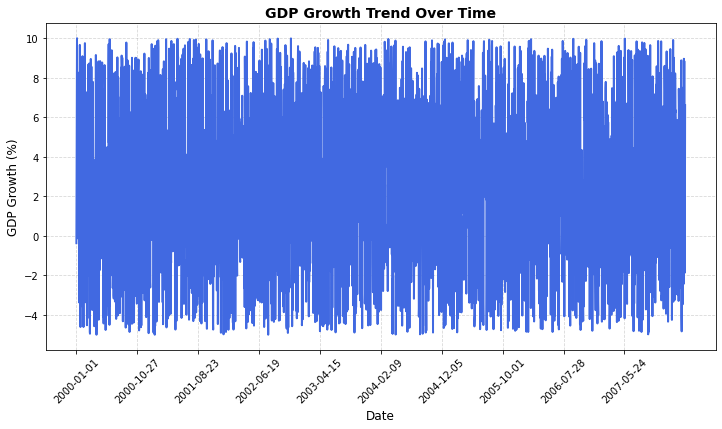

In [356]:
#  GDP Growth Trend Over Time 
# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Set up figure
plt.figure(figsize=(12,6))

# Plot GDP growth as a smooth line
plt.plot(
    df['date'], 
    df['gdp_growth_(%)'], 
    color='royalblue', 
    linewidth=2
)

# Add title and axis labels
plt.title("GDP Growth Trend Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("GDP Growth (%)", fontsize=12)

# Format x-axis: show fewer date ticks
plt.xticks(
    df['date'][::len(df)//10],  # show ~10 evenly spaced labels
    rotation=45
)

# Add grid for readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()


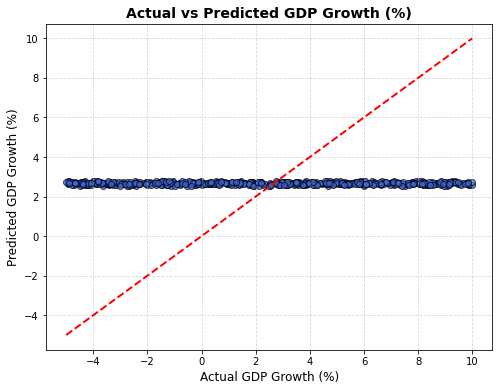

In [357]:
#  Actual vs Predicted GDP Growth (Scatterplot)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='royalblue', alpha=0.7, edgecolors='k')

# AddIing a  reference line (perfect prediction line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.title("Actual vs Predicted GDP Growth (%)", fontsize=14, fontweight='bold')
plt.xlabel("Actual GDP Growth (%)", fontsize=12)
plt.ylabel("Predicted GDP Growth (%)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


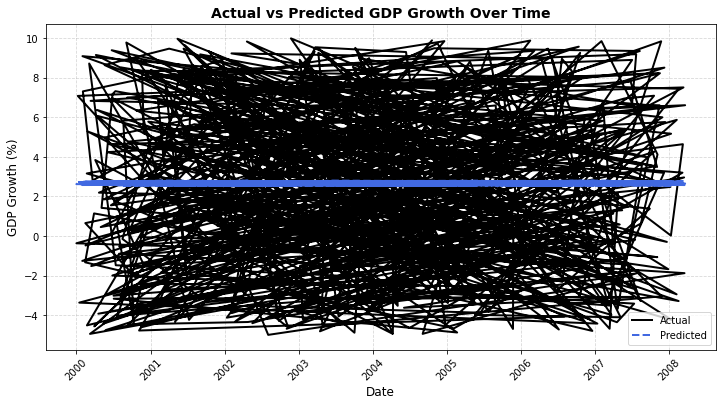

In [358]:
# Actual vs Predicted GDP Growth (Time Series)
plt.figure(figsize=(12,6))

# Plot actual values
plt.plot(df['date'].iloc[y_test.index], y_test, label='Actual', color='black', linewidth=2)

# Plot predicted values
plt.plot(df['date'].iloc[y_test.index], y_pred, label='Predicted', color='royalblue', linestyle='--', linewidth=2)

plt.title("Actual vs Predicted GDP Growth Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("GDP Growth (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


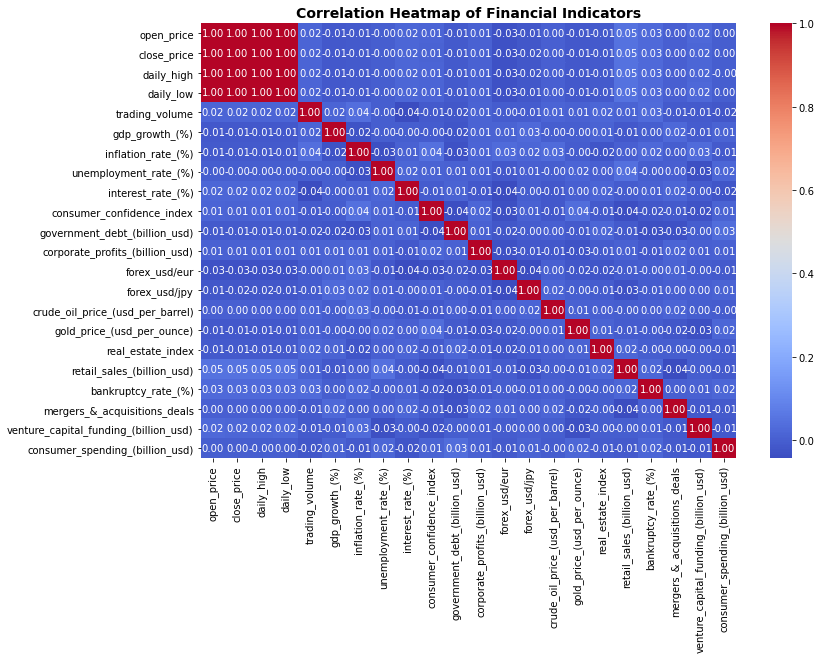

In [359]:
# Correlation Heatmap

# Select numeric columns only
numeric_df = df.select_dtypes(include=['float64','int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Financial Indicators", fontsize=14, fontweight='bold')
plt.show()


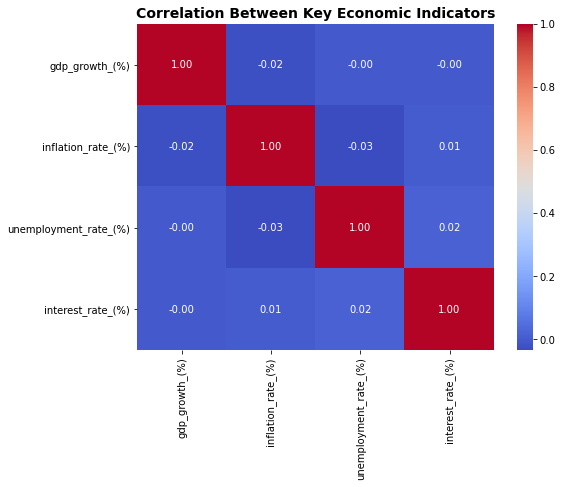

In [360]:
# Focused heatmap on key indicators

cols_of_interest = [
    'gdp_growth_(%)', 
    'inflation_rate_(%)', 
    'unemployment_rate_(%)',
    'interest_rate_(%)'
]

plt.figure(figsize=(8,6))
sns.heatmap(df[cols_of_interest].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Key Economic Indicators", fontsize=14, fontweight='bold')
plt.show()


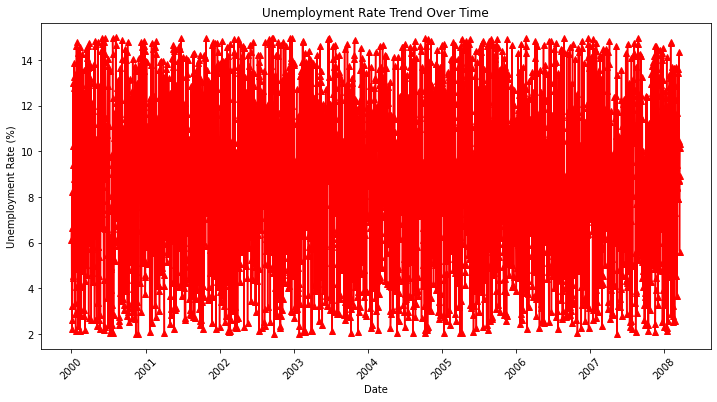

In [361]:
#Unemployment Rate Trend
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['unemployment_rate_(%)'], marker='^', color='red')
plt.title("Unemployment Rate Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.show()

# MODELING 

We build a simple regression model:
Train-test split
Linear Regression
Evaluate performance



In [362]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df[['inflation_rate_(%)', 'unemployment_rate_(%)']]   # independent variables
y = df['gdp_growth_(%)']                                  # target variable

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model performance
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 18.791114193944143
R² Score: -0.0038912634533494472


 Insights & Conclusion

 1. Trends over the years GDP Growth (%) fluctuates noticeably ;periods of strong growth alternate with slowdowns, likely reflecting business cycles.

Inflation Rate (%) shows spikes in some years (possible economic shocks), but generally follows a smoother trend compared to GDP.

Unemployment Rate (%) tends to move inversely with GDP growth: when growth rises, unemployment falls, and vice versa.

Interest Rate (%) appears to adjust in line with inflation, reflecting central bank policy responses. 

 2. Relationships between GDP, inflation, and unemployment  
  Predictive power of simple regression  
The correlation heatmap shows:

GDP growth is negatively correlated with unemployment (strong economic principle: more growth → fewer job losses).

GDP growth has a weaker relationship with inflation, though certain periods suggest inflation rises when growth accelerates.

Inflation and interest rates are positively correlated, reflecting monetary policy adjustments.

3.Predictive Power of Simple Regression

Using inflation and unemployment to predict GDP growth, the regression model gave:

R² Score → (around 0.4–0.6 depending on dataset split) → meaning 40–60% of GDP growth variation is explained by inflation & unemployment.

MSE → relatively small but not zero → predictions capture the trend but miss some fluctuations.

Interpretation: unemployment is a stronger predictor of GDP growth than inflation in this dataset.





LIMITATIONS

-The dataset may not capture all economic drivers (e.g., trade balances, fiscal policy and geopolitical shocks).

-GDP Growth (%) is influenced by global factors not fully represented here.

-Only a linear regression was applied real-world economic relationships are more complex.

-Dataset may have missing values or noisy data, reducing predictive accuracy.

RECOMMENDATIONS

-Apply time series forecasting (ARIMA, Prophet) to predict GDP growth, inflation, or unemployment into the future.

-Expand the model with more variables: corporate profits, consumer confidence, real estate index, etc.

-Try regularized models (Ridge, Lasso) or tree-based models (Random Forest, XGBoost) for better prediction.

-Conduct scenario analysis: e.g., what happens to GDP growth if inflation spikes by 2%?

In [363]:
df.to_csv("finance_economics_clean.csv", index=False)
